In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
files = os.listdir('data')
if 'data_2d.csv' in files and 'mnist.csv' in files:
    print("Files found.")
else:
    print("Files not found, try again.")

Files found.


#### Розпакуємо файли і перевіримо їх.

In [13]:
df = pd.read_csv("data/data_2d.csv", header=None)

df

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [14]:
mnist_df = pd.read_csv("data/mnist.csv", header=None)

mnist_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data_2d.csv

#### Використаємо метод ліктя для визначення оптимальної кількості кластерів в файлі data_2d.csv

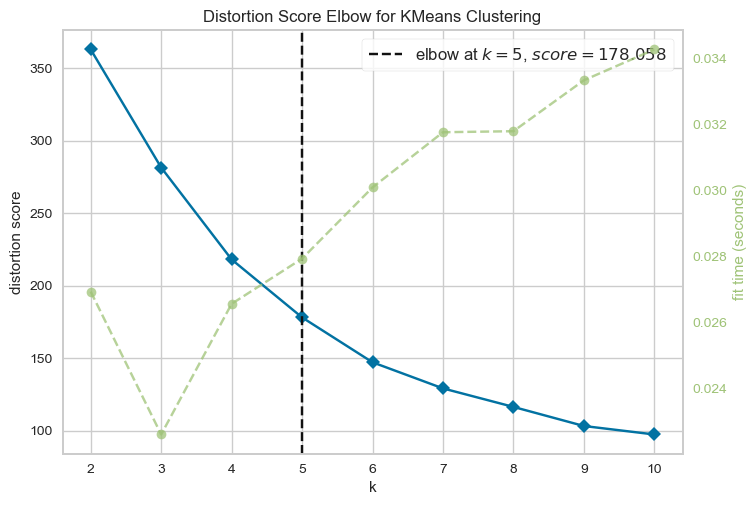

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
df = pd.read_csv("data/data_2d.csv")


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(df)
visualizer.show()

#### Кластеризація даних з використанням оптимальної кількості кластерів.

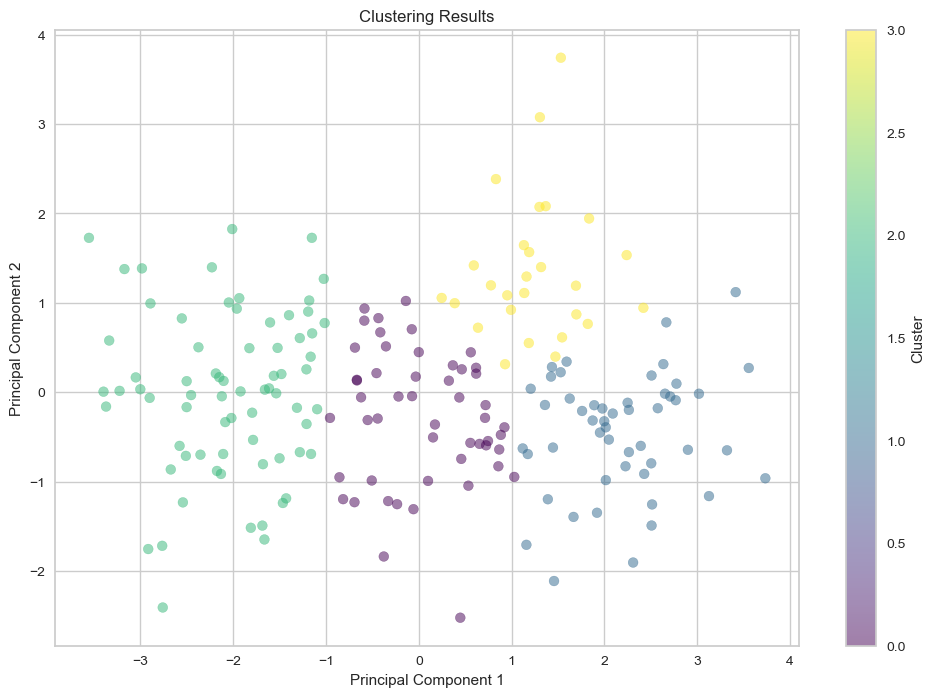

In [18]:
df = pd.read_csv("data/data_2d.csv")

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(df)

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)
plt.figure(figsize=(12, 8))
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## Mnist.csv

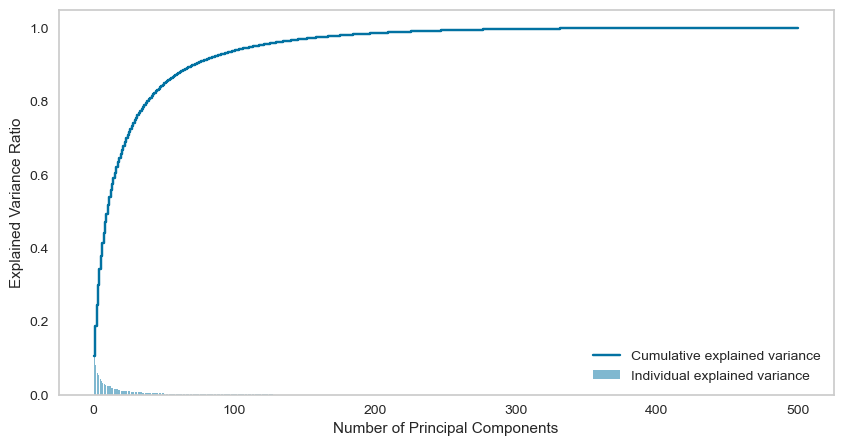

In [19]:
pca = PCA()
pca.fit(mnist_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid()
plt.show()

#### Використаємо метод ліктя для визначення оптимальної кількості кластерів mnist.csv

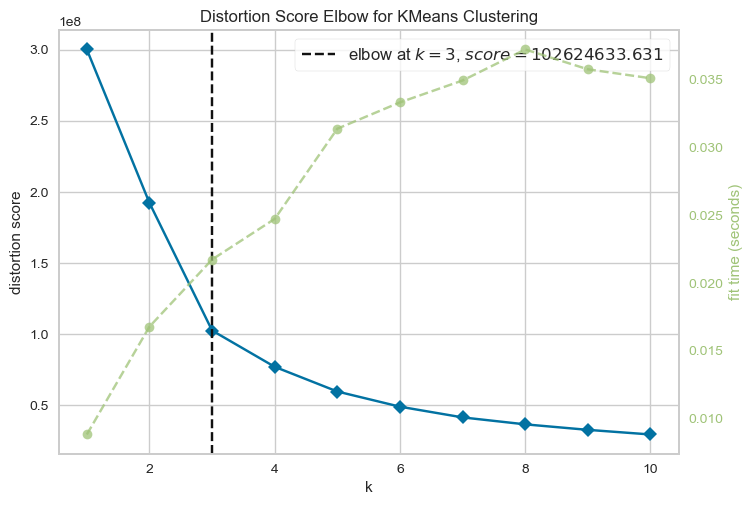

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
mnist_df = pd.read_csv("data/mnist.csv", header=None)
pca = PCA(n_components=2) # встановлення значення n_components=2 для PCA дозволяє зменшити розмірність даних до двох головних компонент, що дозволяє візуалізувати дані в двовимірному просторі
mnist_2d = pca.fit_transform(mnist_df)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(mnist_2d)
visualizer.show()

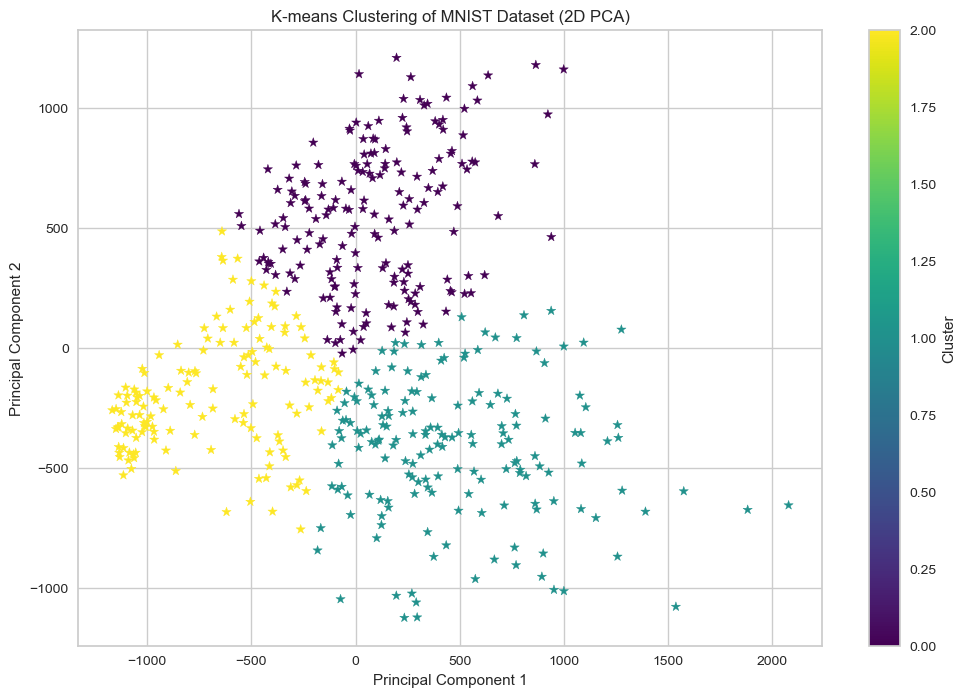

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(mnist_2d)
clusters = kmeans.predict(mnist_2d)

plt.figure(figsize=(12, 8))
plt.scatter(mnist_2d[:, 0], mnist_2d[:, 1], c=clusters, cmap='viridis', marker='*')
plt.title('K-means Clustering of MNIST Dataset (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Висновок:

В даній роботі ми успішно використовуємо метод ліктя для визначення оптимальної кількості кластерів датасету для аналізу даних.

Для того, щоб оптимізувати підготовку даних для подальшого аналізу - застосували метод зменшення розмірності (РСА), щоб перевести представлення даних до двовимірного варіанту за рахунок зменшення кількості ознак, причому зі збереженням дисперсії.